# Population statistics

Our goal is to find such strategies attributes that will allow us to predict that a strategy have a chance to achieve high profits and low volatility in the future.

'Future' means after 7, 14, 21, 30, 60, 90, ..., 360 days from today. 

We will calculate a whole Collective2 strategies population data: Rate of change (ROC) after 7, 14, ..., 360 from today.

Then, we select a sample of strategies by some attribute and make a statistical hypothesis test: Is ROC of the selected sample higher than the ROC of the population?

Similarly, we calculate volatility of ROC of population and make a test, if the volatility of sample ROC is less than the volatility of the population.

To do that, we calculate averages and standard deviations (SD) of ROC of the whole C2 strategies population and define our metric which allows to compare results. We are trying to find a set of strategies with higer average and lower SD than the population stats.

Mathematicaly it is a ratio: `Return / SD(Return)`

Let's get this ratio as our metric and denote it **Mtrc01** in this research. (We can develop other metrics later.)

An input to the population statistics calculation are strategies older than 90 days. It means 3 months, 60 working days. The reason is that we need some time to accumulate informations about strategies. Specifically, we need some minimal number of observations which allows us to calculate reliable statistics. 

Working on this research, I have found that we have a large number of strategies which do not survive 3 months. We have even a significant number of strategies that do not survive 7, 14, ... days or 1-2 months. Such strategies create just white noise which disrupts statistics.

So do not forget that SQL commands selecting data from the database should contain a condition `Age > 90` if you are working with statistics which needs a minimal number of observations.

See [Math](./Mtrc01_Doc_Math.ipynb).



In [1]:
source("JupyterUtils.R")
source("C2ScorePopulationReturnsData.R")

In [2]:
data = getPopulationStatsData()
data$byRows

ROC_Days,Mean,SD,Observations,Mtrc01
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,0.00146273,0.04917649,621257,0.030
14,0.00344427,0.06705539,605485,0.051
21,0.00565072,0.08028855,589758,0.070
30,0.00868381,0.09475996,569623,0.092
60,0.01988954,0.13113940,503644,0.152
90,0.03345622,0.15886855,438947,0.211
120,0.04758367,0.18207792,382844,0.261
150,0.06213112,0.20396109,337485,0.305
180,0.07585675,0.22344344,300047,0.339


30 days returns: Number of observations = 612242  SD =  0.1013716 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9990519 -0.0198760 -0.0001148  0.0065337  0.0400451  0.9575920 


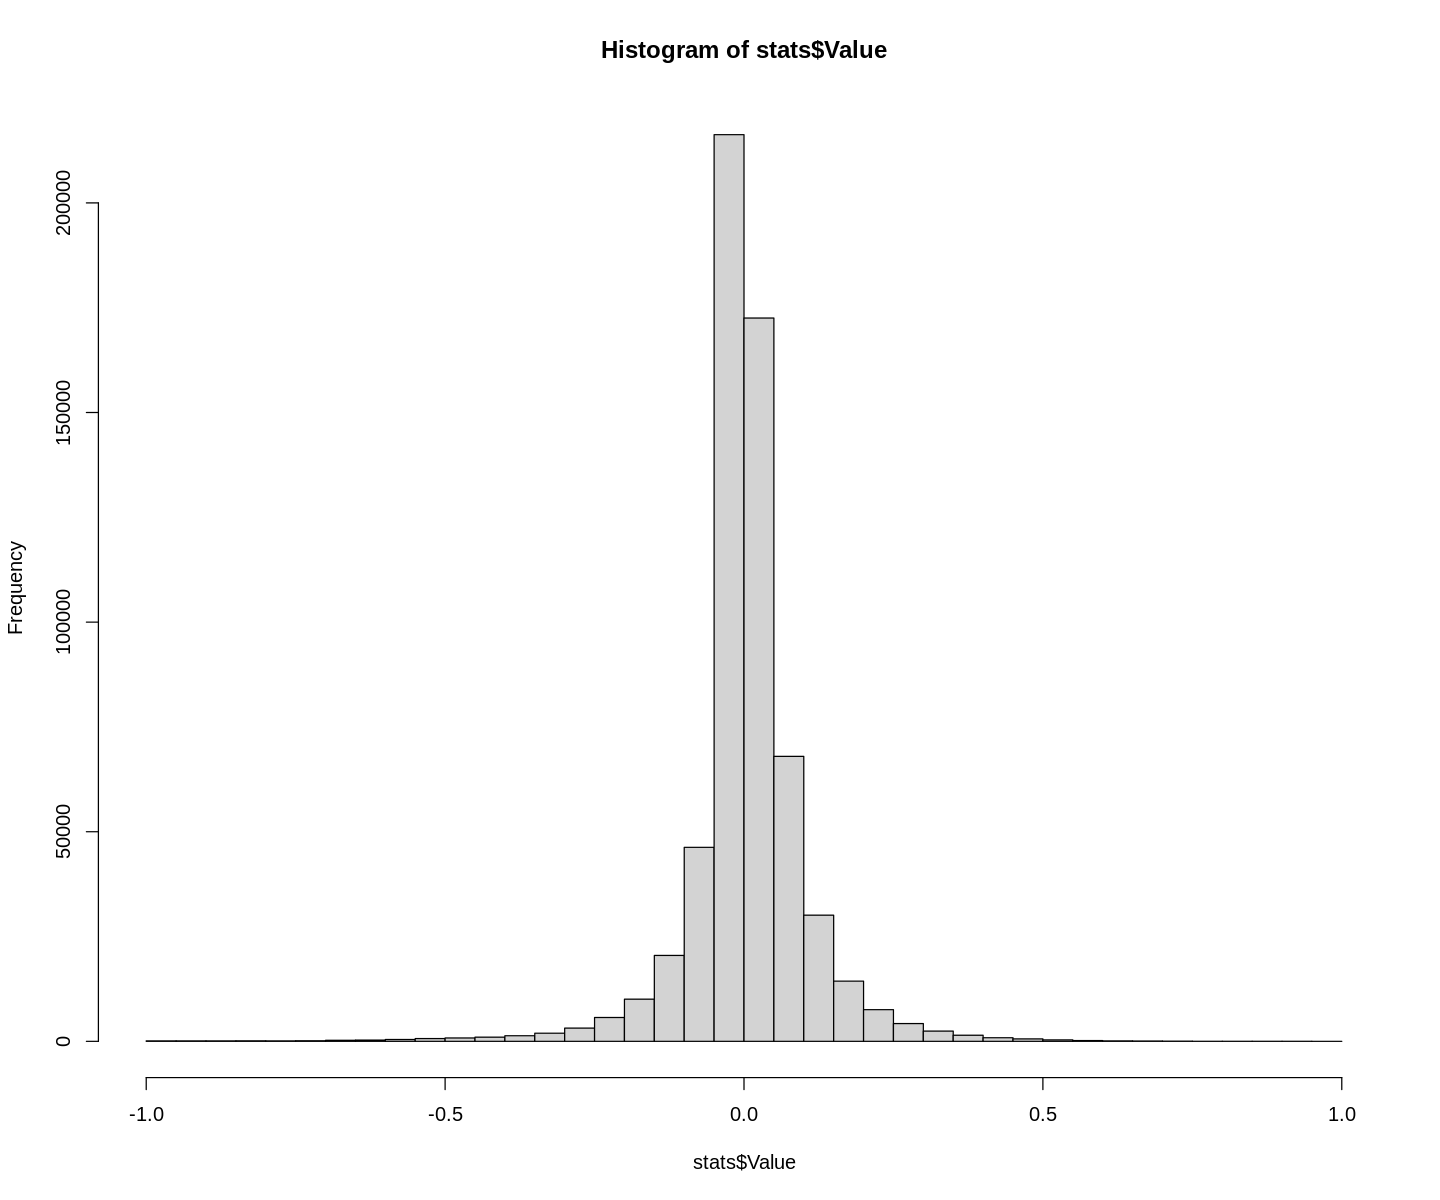

In [3]:
stats = getC2ScoreDbData("select Return030 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity030 is not null and Equity030 > 0")
cat("30 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

60 days returns: Number of observations = 511616  SD =  0.1325716 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.99739 -0.02375  0.00413  0.01944  0.06667  1.61611 


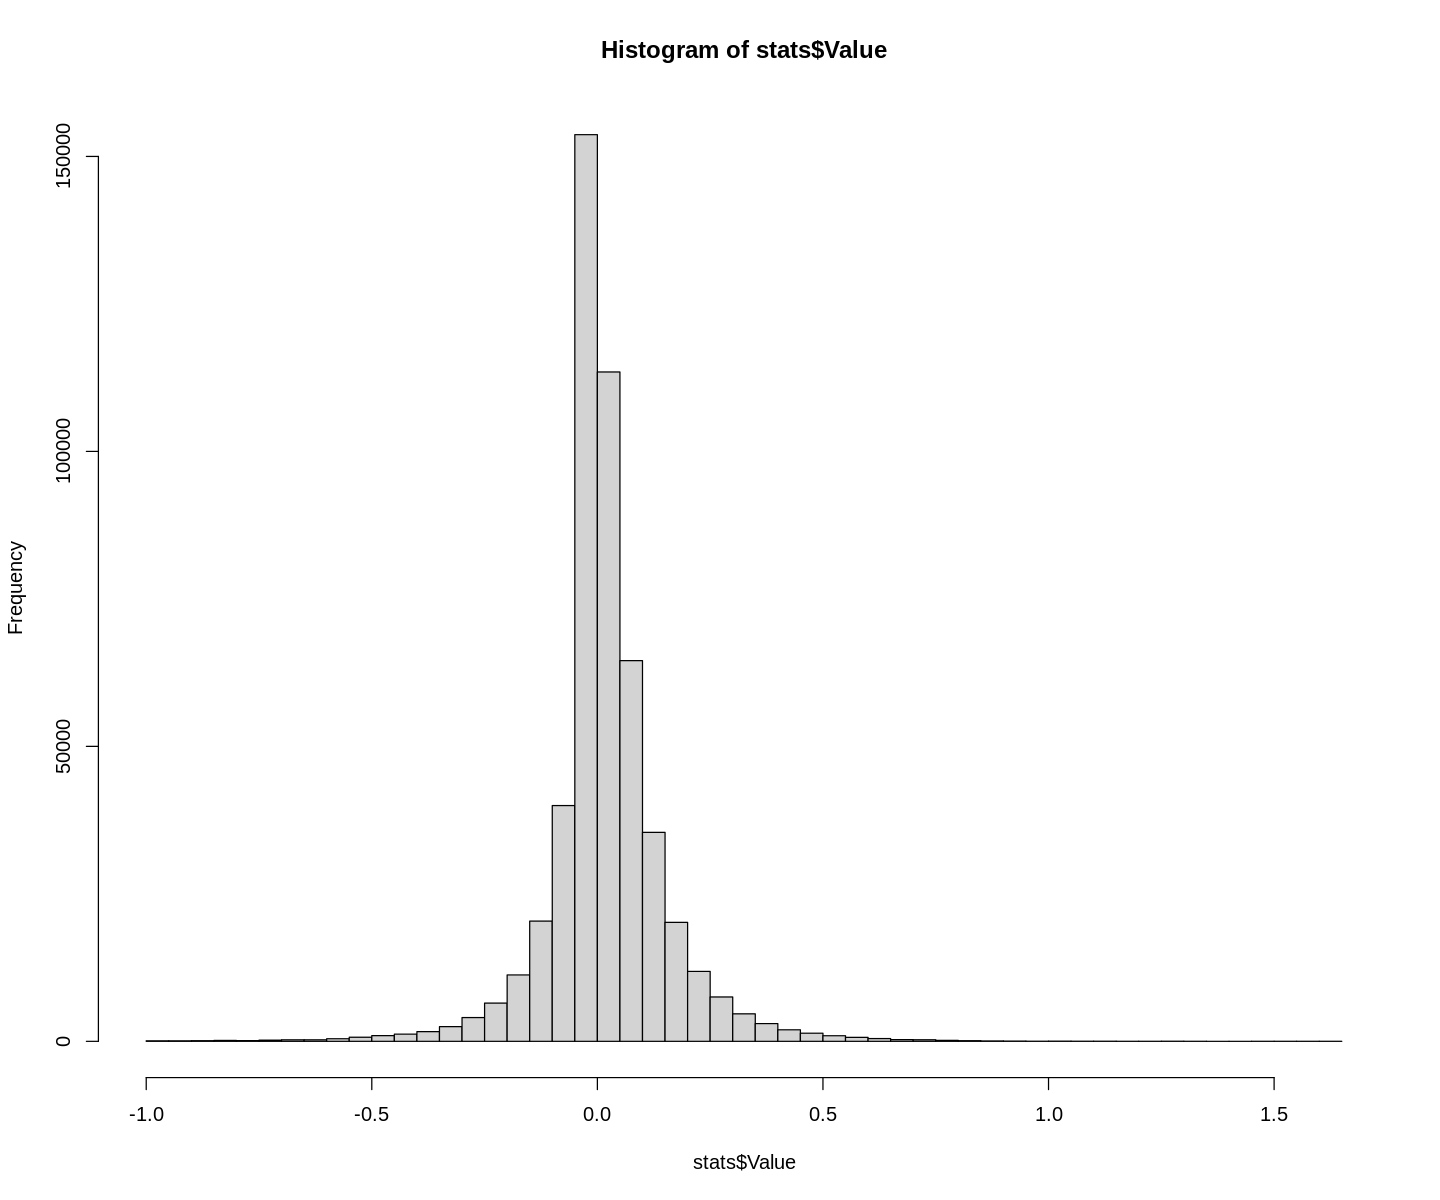

In [4]:
stats = getC2ScoreDbData("select Return060 as Value from ReturnsDataInIntervalsCleaned where 
                         Equity060 is not null and Equity060 > 0")
cat("60 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

90 days returns: Number of observations = 439033  SD =  0.1588706 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.99514 -0.02412  0.01075  0.03348  0.09124  1.65465 


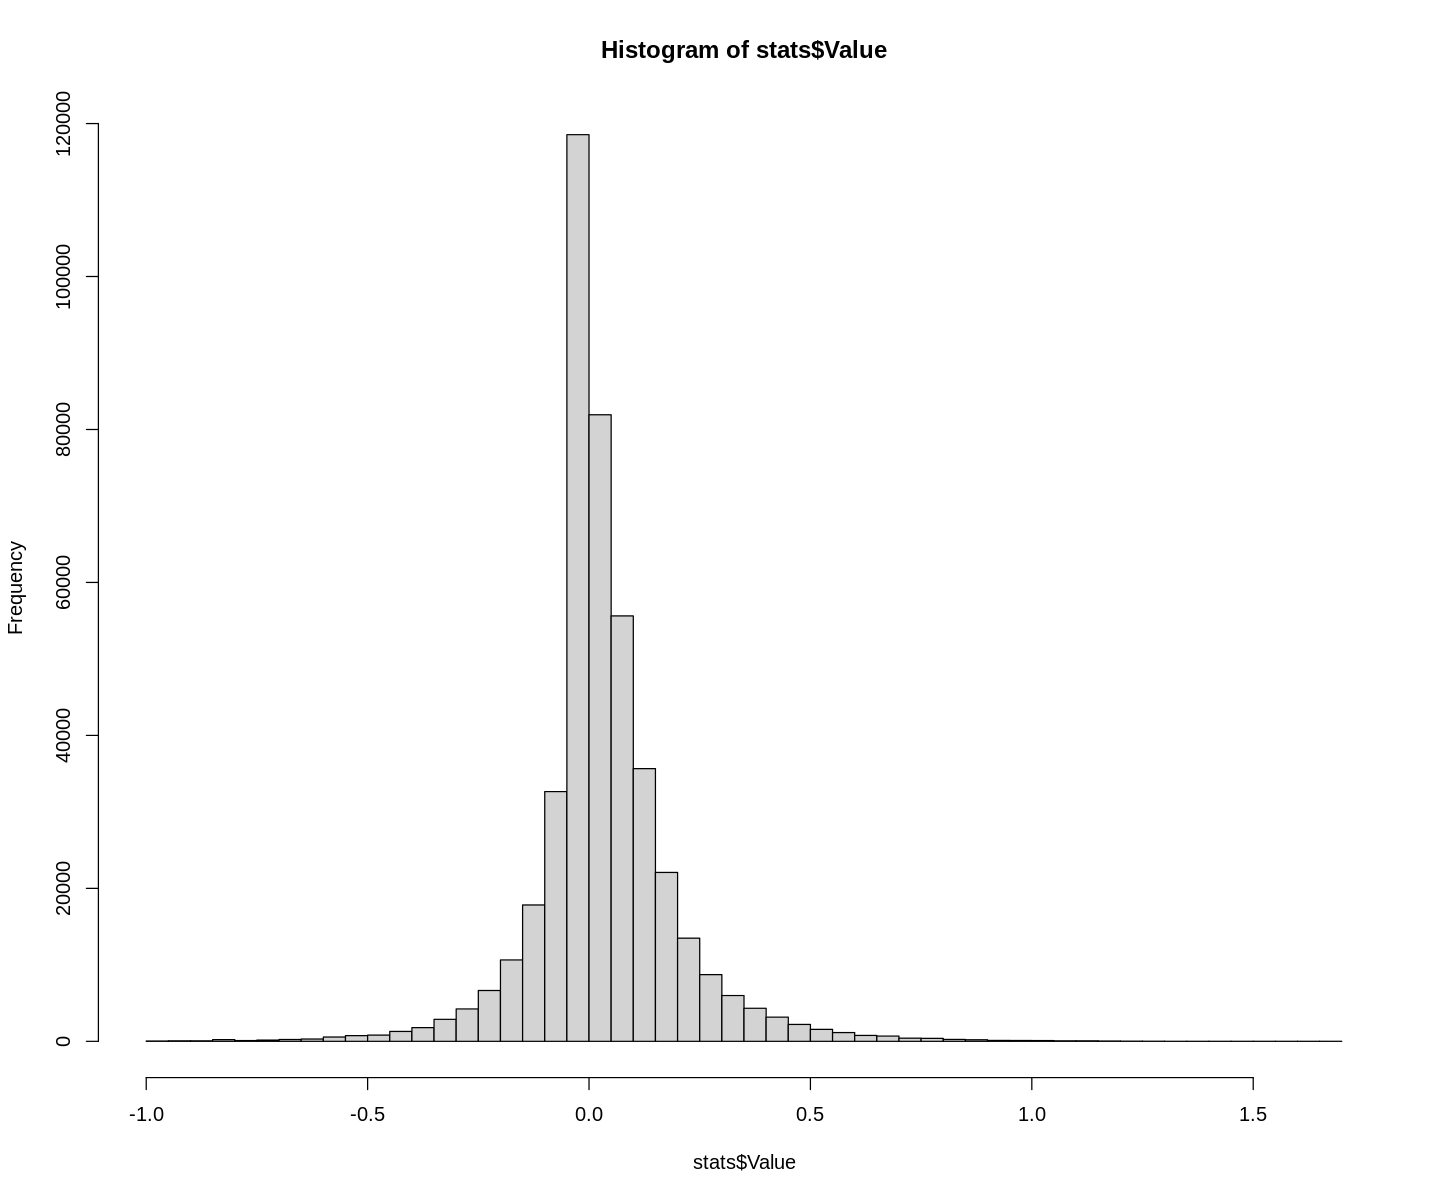

In [5]:
stats = getC2ScoreDbData("select Return090 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity090 is not null and Equity090 > 0")
cat("90 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

120 days returns: Number of observations = 382900  SD =  0.1820806 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98917 -0.02337  0.01760  0.04761  0.11350  1.91412 


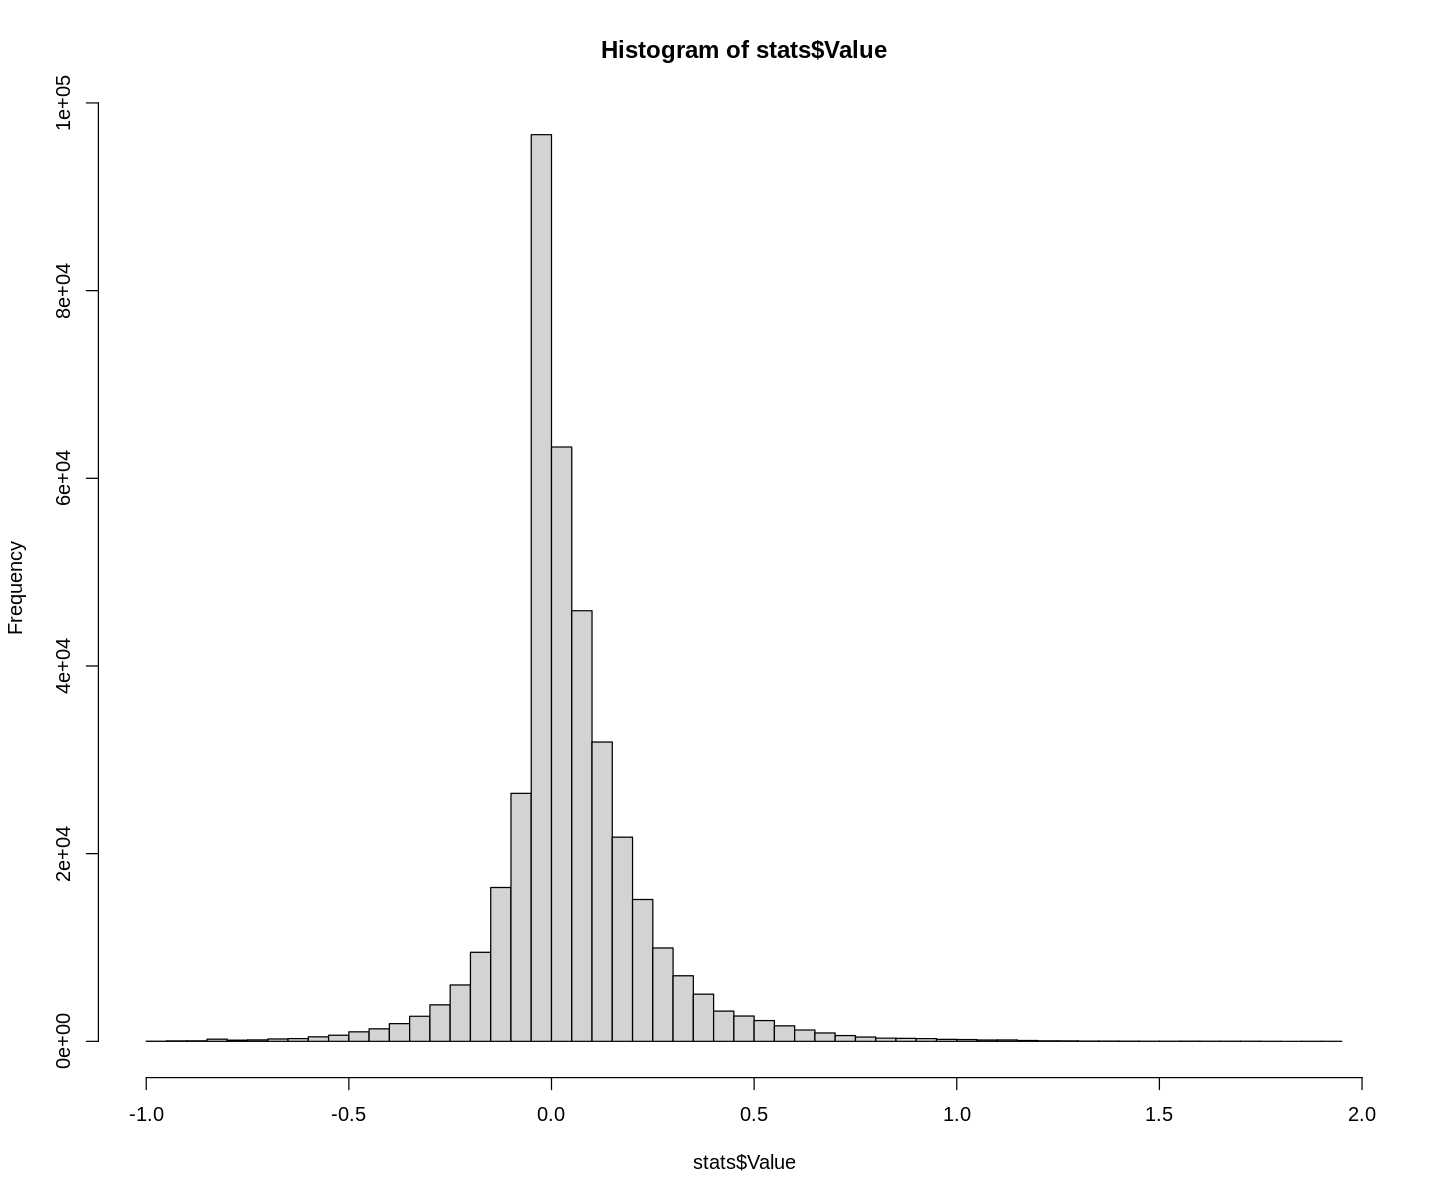

In [6]:
stats = getC2ScoreDbData("select Return120 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity120 is not null and Equity120 > 0")
cat("120 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

150 days returns: Number of observations = 337511  SD =  0.203966 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98888 -0.02188  0.02443  0.06215  0.13515  1.84215 


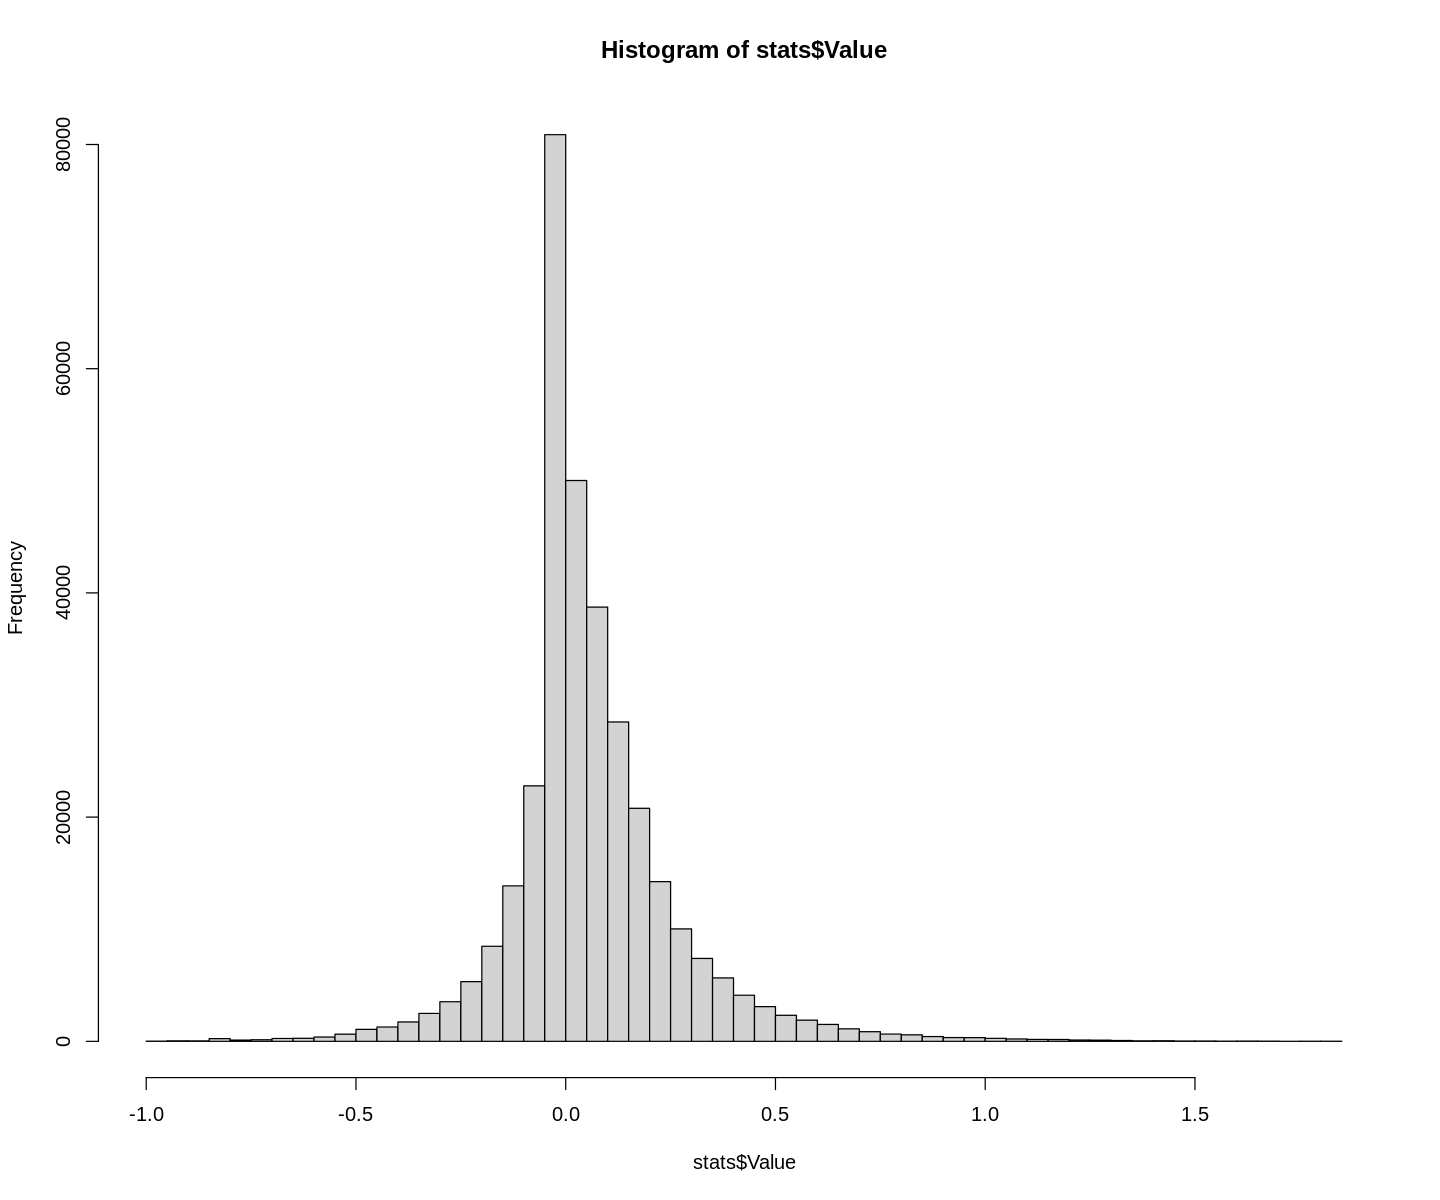

In [7]:
stats = getC2ScoreDbData("select Return150 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity150 is not null and Equity150 > 0")
cat("150 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

180 days returns: Number of observations = 300047  SD =  0.2234434 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98882 -0.02195  0.03083  0.07586  0.15372  1.90458 


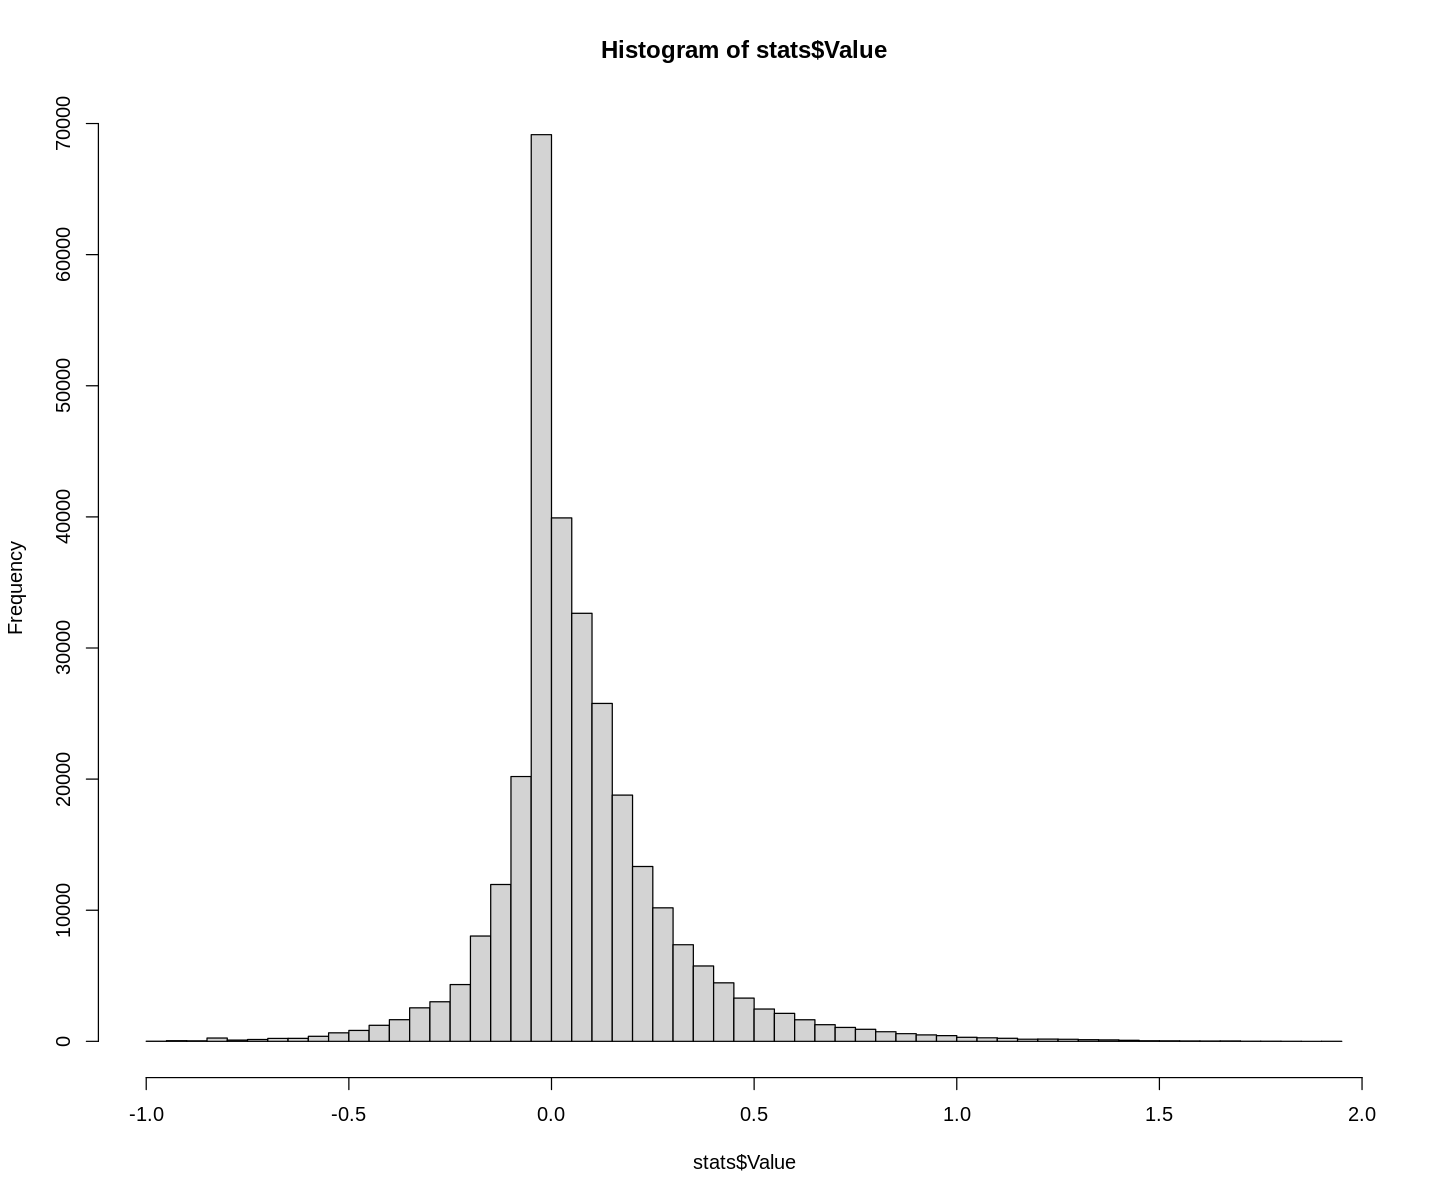

In [8]:
stats = getC2ScoreDbData("select Return180 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity180 is not null and Equity180 > 0")
cat("180 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

210 days returns: Number of observations = 268077  SD =  0.2432374 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98957 -0.02377  0.03638  0.08994  0.17363  2.01943 


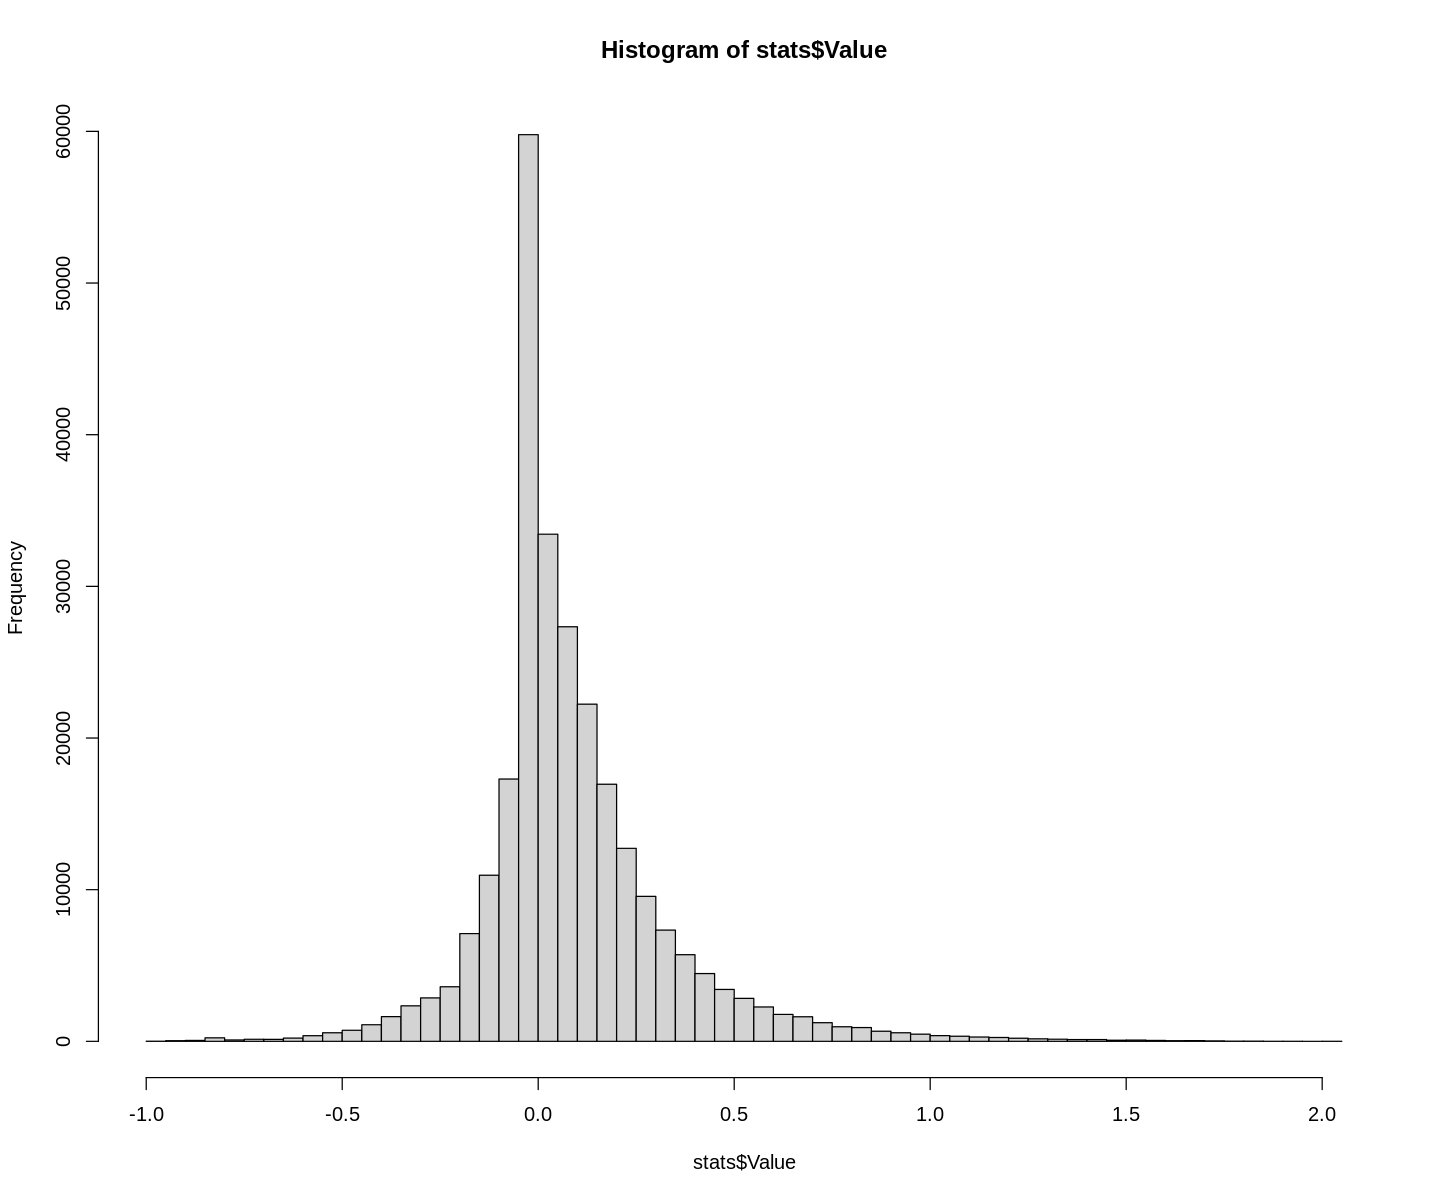

In [9]:
stats = getC2ScoreDbData("select Return210 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity210 is not null and Equity210 > 0")
cat("210 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

240 days returns: Number of observations = 240116  SD =  0.2639518 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98917 -0.02539  0.04388  0.10319  0.19250  2.64311 


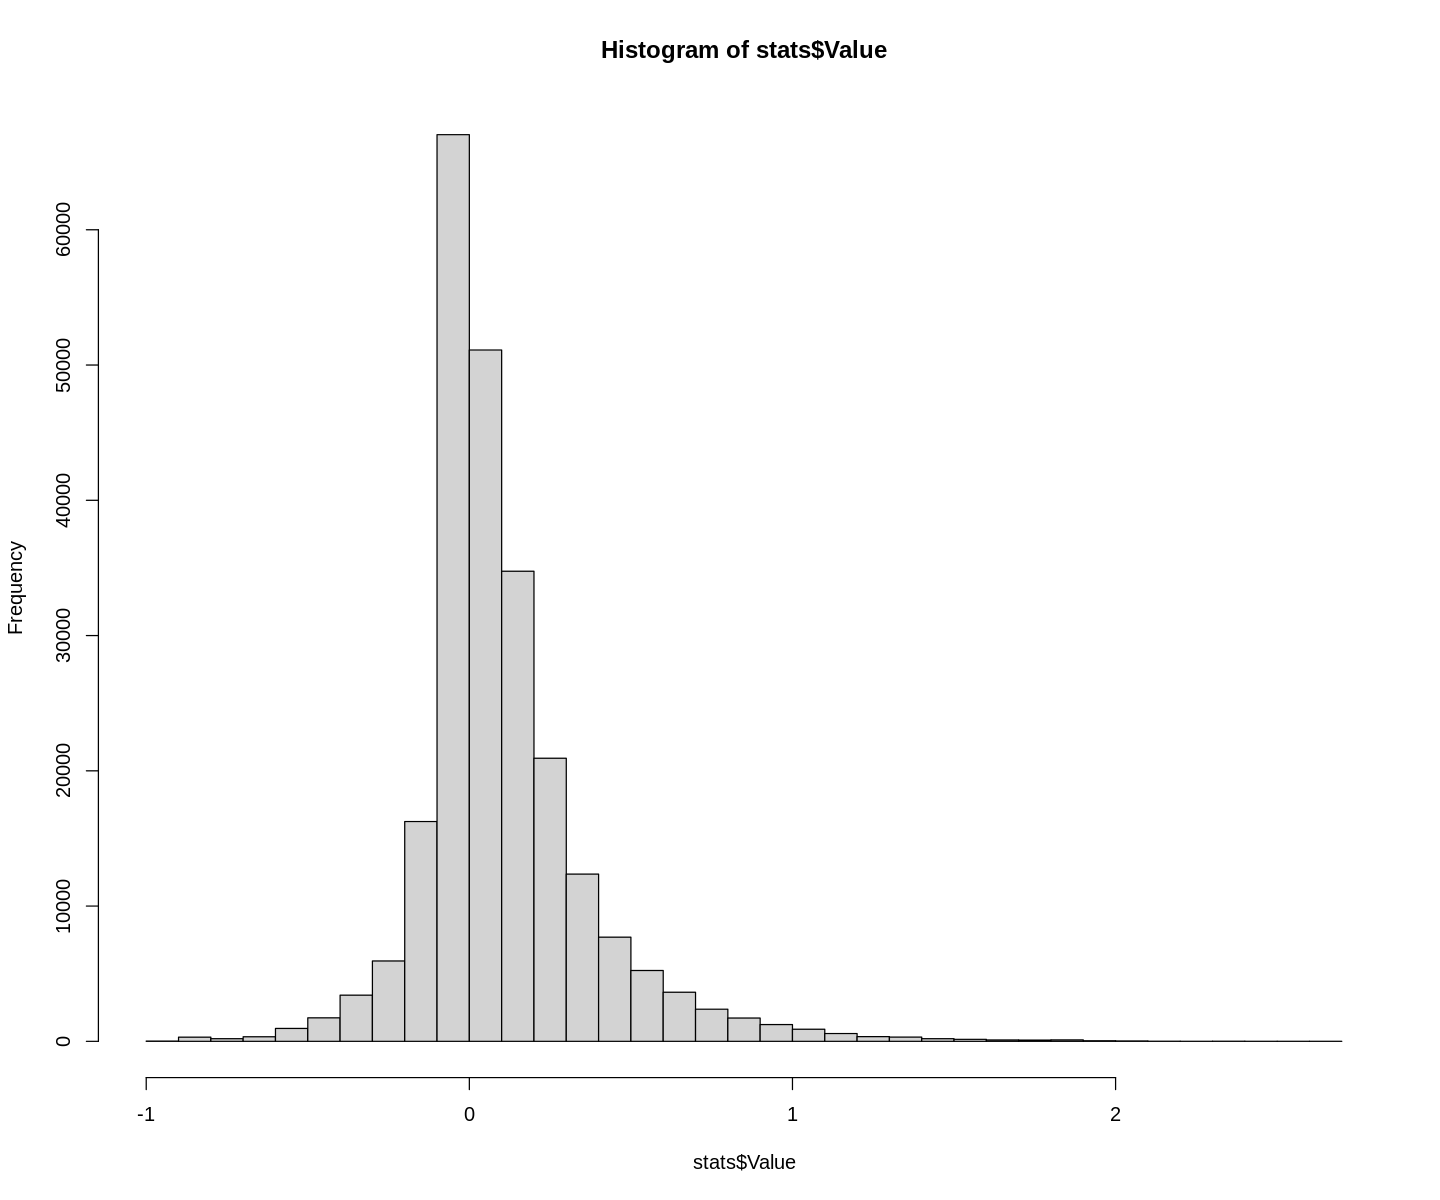

In [10]:
stats = getC2ScoreDbData("select Return240 as Value from ReturnsDataInIntervalsCleaned 
                                 where Equity240 is not null and Equity240 > 0")
cat("240 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

270 days returns: Number of observations = 215327  SD =  0.2846265 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98854 -0.02547  0.05115  0.11693  0.21412  3.29189 


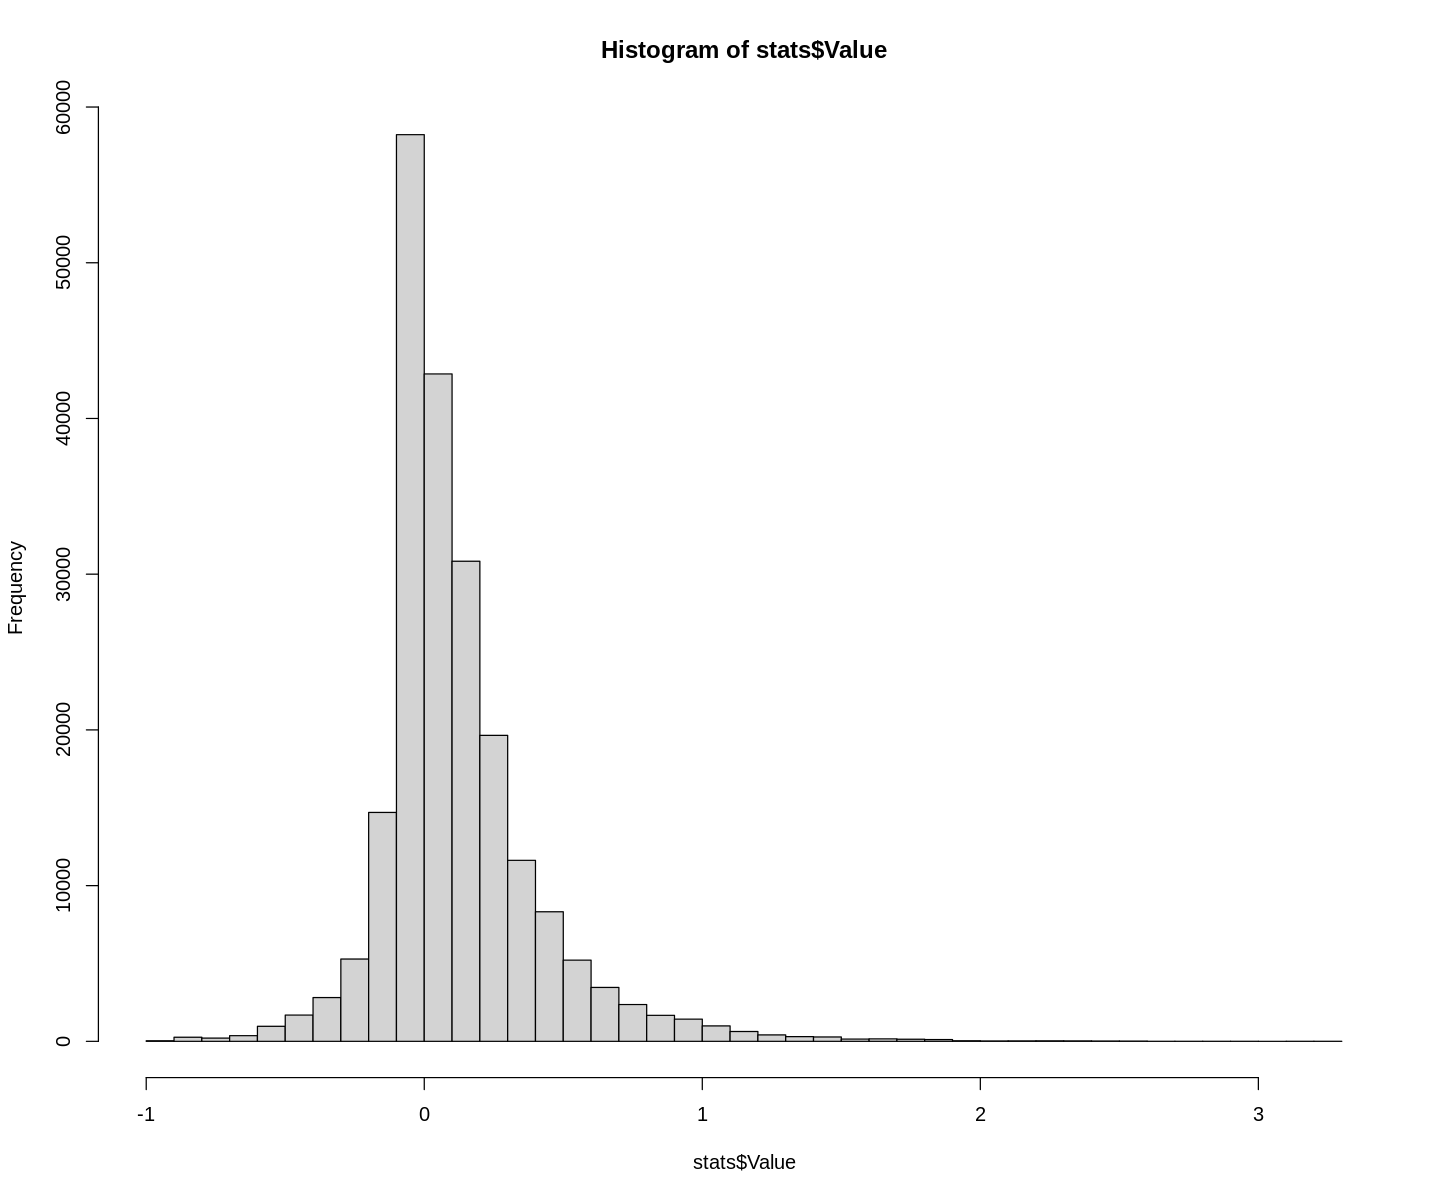

In [11]:
stats = getC2ScoreDbData("select Return270 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity270 is not null and Equity270 > 0")
cat("270 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

300 days returns: Number of observations = 193275  SD =  0.3048285 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98479 -0.02413  0.06004  0.13014  0.23420  3.44715 


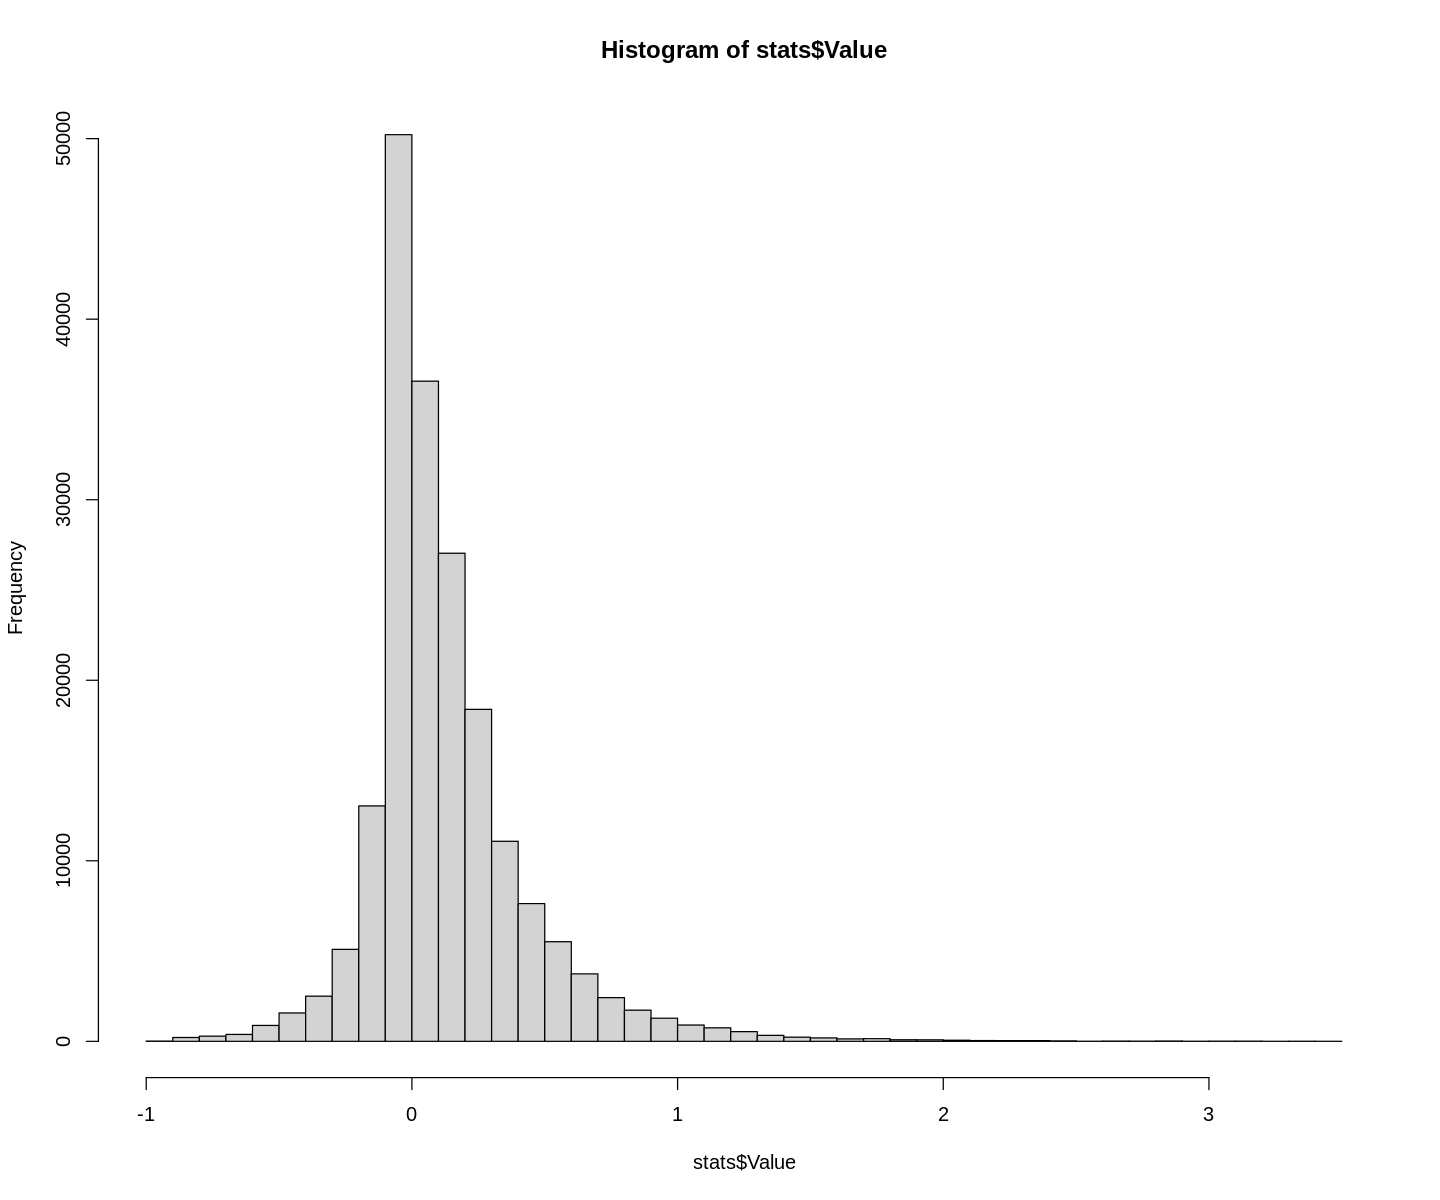

In [12]:
stats = getC2ScoreDbData("select Return300 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity300 is not null and Equity300 > 0")
cat("300 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)